In [ ]:
import json
import numpy as np
import os
import pandas as pd
import tensorflow.keras.callbacks as tfcb
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from collections import Counter
import seaborn as sns

In [ ]:
#registrasi path drive ke notebook colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/My Drive/Colab Notebooks/Skripsi')

# Preparing

In [ ]:
data_p = "data_mfcc.json"

In [ ]:
def load_data(data_path):
  """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Input
        :return y (ndarray): Targets
  """

  with open(data_path, "r") as fp:
    data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

  print("Data lock & loaded")

  return  X, y


In [ ]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history model
        :ndak return apa apa:
    """

    fig, axs = plt.subplots(2)

    # accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # error/loss sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error/Loss")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()



In [ ]:
X, y = load_data(data_p)

Data lock & loaded


In [ ]:
X.shape

(828, 259, 13)

In [ ]:
X[0]

array([[-182.04205322,   97.91833496,  -25.59497452, ...,  -22.24294662,
           0.68390238,  -19.38136292],
       [-177.68513489,   98.11112213,  -32.89652634, ...,  -21.98709297,
           1.99185419,  -21.17561722],
       [-191.04977417,   99.56552124,  -45.36515808, ...,  -20.64328384,
           4.0839591 ,  -23.97819901],
       ...,
       [-672.63452148,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [-672.63452148,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [-672.63452148,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

In [ ]:
X[0][0]

array([-182.04205322,   97.91833496,  -25.59497452,   25.61157608,
         -7.65173531,    8.55594349,  -16.67509079,  -14.51755905,
         -2.89274716,  -16.80021286,  -22.24294662,    0.68390238,
        -19.38136292])

In [ ]:
X[0][0][0]

-182.04205322265625

In [ ]:
y.shape

(828,)

In [ ]:
y[821]

3

In [ ]:
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Mendefinisi callback
callbacks = tfcb.EarlyStopping(
    monitor='val_loss',
    min_delta=0.5,
    patience=5,
    verbose=1,
)

#Rancang Model Klasifikasi

In [ ]:
model2 = keras.Sequential([

        # input layer
        keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

        # dense layer 1
        keras.layers.Dense(512, activation='relu',
                           kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.2),

        # dense layer 2
        keras.layers.Dense(256, activation='relu'),

        # dense layer 3
        keras.layers.Dense(64, activation='relu'),

        # output layer
        keras.layers.Dense(4, activation='softmax')
    ])

In [ ]:
# compile model
opt = keras.optimizers.Adam(learning_rate=0.0001)
model2.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3367)              0         
                                                                 
 dense_16 (Dense)            (None, 512)               1724416   
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dense_18 (Dense)            (None, 64)                16448     
                                                                 
 dense_19 (Dense)            (None, 4)                 260       
                                                                 
Total params: 1872452 (7.14 MB)
Trainable params: 1872

In [ ]:
history = model2.fit(x_train,
                     y_train,
                     validation_data=(x_test, y_test),
                     callbacks = callbacks,
                     batch_size=64,
                     epochs=60)

Epoch 1/60
11/11 [==============================] - 2s 62ms/step - loss: 69.9469 - accuracy: 0.2538 - val_loss: 23.3942 - val_accuracy: 0.4458
Epoch 2/60
11/11 [==============================] - 0s 39ms/step - loss: 30.5694 - accuracy: 0.3973 - val_loss: 20.0125 - val_accuracy: 0.3735
Epoch 3/60
11/11 [==============================] - 0s 39ms/step - loss: 21.3678 - accuracy: 0.4562 - val_loss: 14.1064 - val_accuracy: 0.5723
Epoch 4/60
11/11 [==============================] - 0s 38ms/step - loss: 20.1939 - accuracy: 0.4350 - val_loss: 11.8366 - val_accuracy: 0.5783
Epoch 5/60
11/11 [==============================] - 1s 48ms/step - loss: 14.6747 - accuracy: 0.4985 - val_loss: 9.7292 - val_accuracy: 0.5663
Epoch 6/60
11/11 [==============================] - 1s 47ms/step - loss: 14.3064 - accuracy: 0.4622 - val_loss: 8.3290 - val_accuracy: 0.5361
Epoch 7/60
11/11 [==============================] - 0s 36ms/step - loss: 13.2279 - accuracy: 0.4789 - val_loss: 6.6232 - val_accuracy: 0.6084
Ep

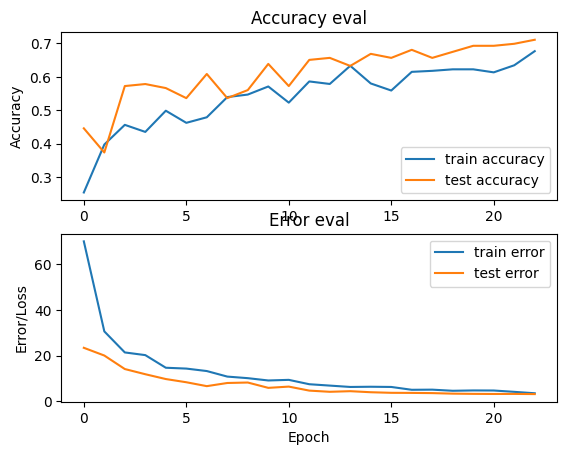

In [ ]:
plot_history(history)

In [ ]:
model2.save("model_mfcc_ann_real.keras")

#Evaluasi Model

## $\color{Green}{\text{Tes Kedua model}}$

In [ ]:
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

6/6 - 0s - loss: 3.4229 - accuracy: 0.6747 - 127ms/epoch - 21ms/step
Restored model, accuracy: 67.47%


In [ ]:
loss, acc = model2.evaluate(x_test, y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

6/6 - 0s - loss: 3.1521 - accuracy: 0.7108 - 65ms/epoch - 11ms/step
Restored model, accuracy: 71.08%


In [ ]:
print(dict(Counter(y_test)))

{1: 40, 2: 42, 0: 40, 3: 44}


In [ ]:
target_labels = [
        "iqlab",
        "idghom",
        "idzhar",
        "ikhfa"
    ]

In [ ]:
def plot_con_matrix (y_target,y_prediksi, normalize=None):
  # y adalah y label, y_ pred adalah y prediksi yang sudah di normalisasikan,
  # normalize adalah tipe nilai yang ingin ditampilkan, biasanya:
  # 'pred' yaitu menampilkan presisi, 'true' %prediksi, 'kosongkan' jumlah

  result_matrix = confusion_matrix(y_target, y_prediksi, normalize=normalize)
  plot_confusion_matrix = ConfusionMatrixDisplay(confusion_matrix=result_matrix,
                              display_labels=target_labels)
  plot_confusion_matrix.plot()

In [ ]:
'''def plot_con_matrix (y_target,y_prediksi, normalize=None):
  # y adalah y label, y_ pred adalah y prediksi yang sudah di normalisasikan,
  # normalize adalah tipe nilai yang ingin ditampilkan, biasanya:
  # 'pred' yaitu menampilkan presisi, 'true' %prediksi, 'kosongkan' jumlah

  result_matrix = confusion_matrix(y_target, y_prediksi, normalize=normalize)

  ax = plt.subplot()
  sns.set(font_scale=3.0) # Adjust to fit
  sns.heatmap(result_matrix, annot=True,
              ax=ax,
              cmap="Blues",
              xticklabels=target_labels,
              fmt="g");

  # Labels, title and ticks
  label_font = {'size':'18'}  # Adjust to fit
  ax.set_xlabel('Predicted labels', fontdict=label_font);
  ax.set_ylabel('True labels', fontdict=label_font);

  #title_font = {'size':'18'}  # Adjust to fit
  #ax.set_title('Confusion Matrix', fontdict=title_font);

  ax.tick_params(axis='both', which='major', labelsize=10)  # Adjust to fit
  ax.xaxis.set_ticklabels(['False', 'True']);
  ax.yaxis.set_ticklabels(['False', 'True']);
  plt.show()'''

### $\color{Blue}{\text{Matrix dengan beban dan dropout}}$

In [ ]:
#percentage
y_predic_w = model2.predict(x_test)
y_predic_w = np.argmax (y_predic_w, axis = 1)

print(classification_report(y_test, y_predic_w, target_names=target_labels))

6/6 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

       Iqlab       0.77      0.82      0.80        40
      Idghom       0.53      0.60      0.56        40
      Idzhar       0.79      0.74      0.77        42
       Ikhfa       0.77      0.68      0.72        44

    accuracy                           0.71       166
   macro avg       0.72      0.71      0.71       166
weighted avg       0.72      0.71      0.71       166



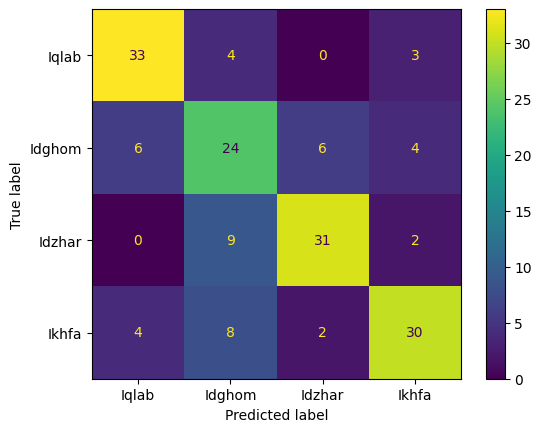

In [ ]:
plot_con_matrix(y_test, y_predic_w)

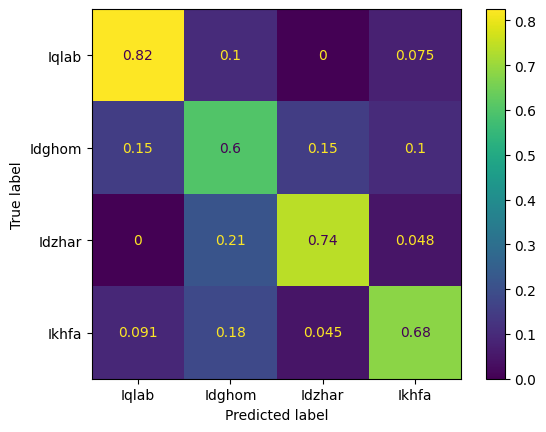

In [ ]:
plot_con_matrix(y_test,  y_predic_w, 'true')

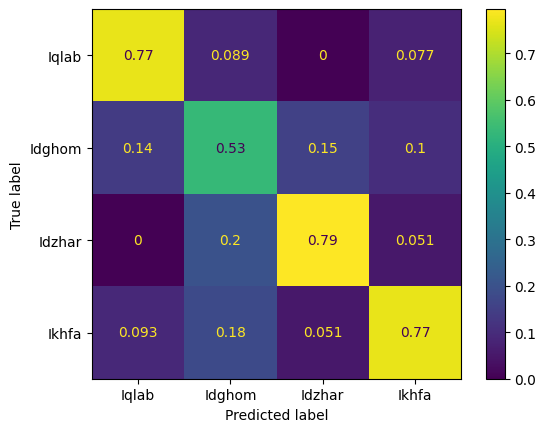

In [ ]:
plot_con_matrix(y_test, y_predic_w, 'pred')